In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [ ]:
insurance_df = pd.read_csv('OriginalClaimData.csv')
insurance_df

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.00,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.00,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.00,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female
3,520.00,Rear end - Clt pushed into next vehicle,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
4,260.00,Rear end,C. 3 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,A. 1 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-08-25 19:24:19.731946,2022-06-30 19:24:19.731946,18.0,18.0,3.0,Hit a deer on the highway.,Concussion and bruised ribs.,No,No,Other
4996,1074.35,Other side pulled out of side road,H. 8 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-05-30 15:05:56.471294,2023-06-13 15:05:56.471294,NaN,70.0,4.0,Side collision at an intersection.,Fractured arm and leg.,Yes,No,Female
4997,2020.00,Other side pulled out of side road,F. 6 months,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-03-09 13:27:25.529105,2023-08-05 13:27:25.529105,11.0,43.0,1.0,Swerved to avoid another vehicle.,Minor cuts and scrapes.,No,Yes,Male
4998,781.20,Rear end - 3 car - Clt at front,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-02-09 05:32:42.392478,2023-10-18 05:32:42.392478,10.0,69.0,1.0,Lost control on a snowy road.,Sprained ankle and wrist.,No,No,Female


In [3]:
# Drop unnecessary columns
insurance_df.drop(['Accident Description', 'Injury Description'], axis=1, inplace=True)

# Handle nulls
print(insurance_df.isnull().sum())
print("Row count before removing: ", insurance_df.shape[0])
insurance_df.dropna(how='any', inplace=True)
print("Row count after removing: ", insurance_df.shape[0])

SettlementValue               106
AccidentType                  122
Injury_Prognosis              156
SpecialHealthExpenses         130
SpecialReduction              121
SpecialOverage                117
GeneralRest                   128
SpecialAdditionalInjury       134
SpecialEarningsLoss           128
SpecialUsageLoss              130
SpecialMedications            130
SpecialAssetDamage            111
SpecialRehabilitation         116
SpecialFixes                  121
GeneralFixed                  121
GeneralUplift                 137
SpecialLoanerVehicle          139
SpecialTripCosts              115
SpecialJourneyExpenses        147
SpecialTherapy                132
Exceptional_Circumstances     109
Minor_Psychological_Injury    119
Dominant injury               110
Whiplash                      130
Vehicle Type                  126
Weather Conditions            114
Accident Date                 138
Claim Date                    109
Vehicle Age                   126
Driver Age    

Significant number of rows removed. Could look into other methods if it affects accuracy.

Protected characteristics present:

- Age
- Gender

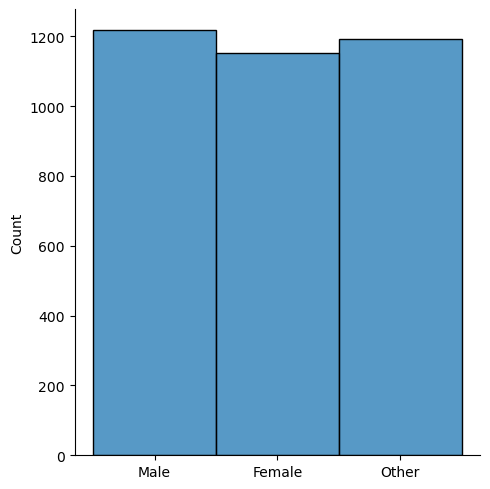

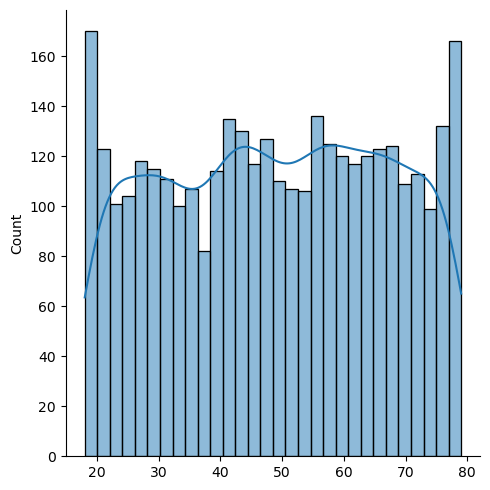

In [4]:
# sns.countplot(x=insurance_df['Gender'])
sns.displot(insurance_df['Gender'].to_numpy())
sns.displot(insurance_df['Driver Age'].to_numpy(), kde=True, bins=30)

Gender:
- Looks reasonably distributed
- Slightly more male than female

Age:
- High counts in lowest and highest ages
- Majority of samples are over 40


No of samples aged 20 or under:  170
Average settlement aged under 20:  1310.55
No of samples aged 77 or under:  166
Average settlement aged over 77:  1180.8
No of male gender samples:  1217
Average settlement for males:  1186.79
No of female gender samples:  1151
Average settlement for female:  1234.83
No of other gender samples:  1193
Average settlement for other:  1200.31


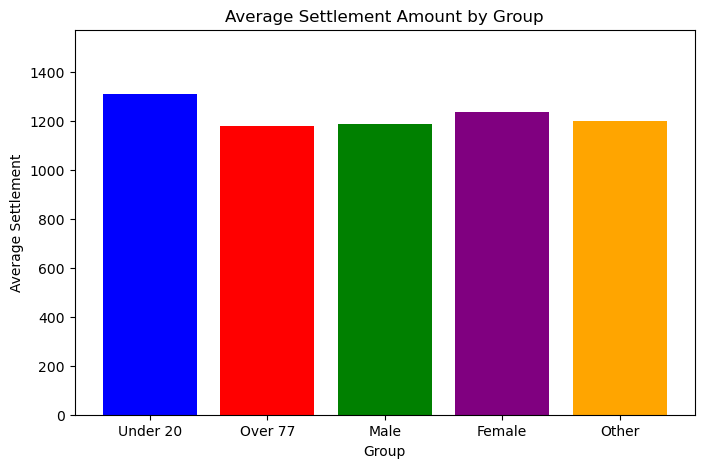

In [24]:
# Is there much difference in target variable Y for these groups...

claims = {
    "over77": {"count": 0, "totalSettlement": 0},
    "under20": {"count": 0, "totalSettlement": 0},
    "male": {"count": 0, "totalSettlement": 0},
    "female": {"count": 0, "totalSettlement": 0},
    "other": {"count": 0, "totalSettlement": 0}
}

for index, row in insurance_df.iterrows():
    if row['Driver Age'] <= 20:
        claims["under20"]["count"] += 1
        claims["under20"]["totalSettlement"] += row['SettlementValue']
        
    if row['Driver Age'] >= 77:
        claims["over77"]["count"] += 1
        claims["over77"]["totalSettlement"] += row['SettlementValue']
        
    if row['Gender'] == "Male":
        claims["male"]["count"] += 1
        claims["male"]["totalSettlement"] += row['SettlementValue']
        
    if row['Gender'] == "Female":
        claims["female"]["count"] += 1
        claims["female"]["totalSettlement"] += row['SettlementValue']
        
    if row['Gender'] == "Other":
        claims["other"]["count"] += 1
        claims["other"]["totalSettlement"] += row['SettlementValue']
        
avgClaimUnder20 = round(claims["under20"]["totalSettlement"] / claims["under20"]["count"], 2)
avgClaimOver77 = round(claims["over77"]["totalSettlement"] / claims["over77"]["count"], 2)
avgClaimMale = round(claims["male"]["totalSettlement"] / claims["male"]["count"], 2)
avgClaimFemale = round(claims["female"]["totalSettlement"] / claims["female"]["count"], 2)
avgClaimOther = round(claims["other"]["totalSettlement"] / claims["other"]["count"], 2)

print("No of samples aged 20 or under: ", claims["under20"]["count"])
print("Average settlement aged under 20: ", avgClaimUnder20)

print("No of samples aged 77 or under: ", claims["over77"]["count"])
print("Average settlement aged over 77: ", avgClaimOver77)

print("No of male gender samples: ", claims["male"]["count"])
print("Average settlement for males: ", avgClaimMale)

print("No of female gender samples: ", claims["female"]["count"])
print("Average settlement for female: ", avgClaimFemale)

print("No of other gender samples: ", claims["other"]["count"])
print("Average settlement for other: ", avgClaimOther)

# Data for plotting
groups = ["Under 20", "Over 77", "Male", "Female", "Other"]
average_settlement = [avgClaimUnder20, avgClaimOver77, avgClaimMale, avgClaimFemale, avgClaimOther]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(groups, average_settlement, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel("Group")
plt.ylabel("Average Settlement")
plt.title("Average Settlement Amount by Group")
plt.ylim(0, max(average_settlement) * 1.2)
plt.show()

Settlement amount looks reasonably balanaced across gender.

Reasonable difference between under 20's and over 77. May have to consider this.

In [25]:
# Data quality
# Accident and claim date are both captured to the millisecond. Unreliable data
# Remove date columns for now as doesn't seem to have any bearing on the problem
# Could look into extracting features instead - weekend, month, season, etc

   SettlementValue AccidentType Injury_Prognosis  SpecialHealthExpenses  \
0            520.0     Rear end      E. 5 months                    0.0   

   SpecialReduction  SpecialOverage  GeneralRest  SpecialAdditionalInjury  \
0               0.0             0.0          0.0                      0.0   

   SpecialEarningsLoss  SpecialUsageLoss  ...  Vehicle Type  \
0                  0.0               0.0  ...    Motorcycle   

   Weather Conditions               Accident Date                  Claim Date  \
0               Rainy  2023-11-10 11:22:24.508901  2024-06-11 11:22:24.508901   

   Vehicle Age  Driver Age  Number of Passengers  Police Report Filed  \
0         13.0        33.0                   4.0                  Yes   

   Witness Present  Gender  
0              Yes    Male  

[1 rows x 34 columns]
